In [1]:
from keras.datasets import mnist

(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train.shape[0], X_test.shape[0]

Using TensorFlow backend.


(60000, 10000)

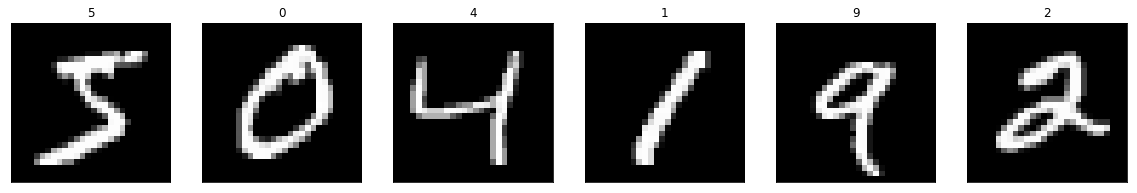

In [2]:
# visualize the first six traning images
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

# plot first six traning images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
#     print(img.max())
    thresh = img.max()/2.5
#     print(thresh)
    for x in range(width):
        for y in range(height):
#             print(img[x][y], end =' ')
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
            ha='center',
            va='center',
            color='white' if img[x][y]<thresh else 'black')



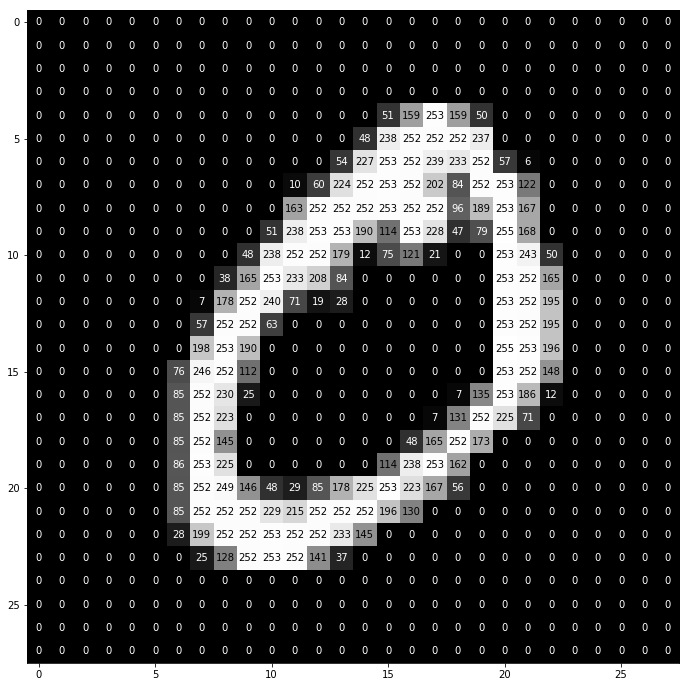

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[1], ax)

In [5]:
# rescale [0, 255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test  = X_test.astype('float32')/255

In [6]:
from keras.utils import np_utils
print(y_train[0])
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test,10)
y_train[0]

5


array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

In [9]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [10]:
# calculate the classification accuracy on the test set (before train)
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = score[1]*100
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 8.1100%


In [11]:
# train the model
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1,save_best_only=True)

model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer],verbose=1,
         shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s - loss: 0.2789 - acc: 0.9137 - val_loss: 0.1274 - val_acc: 0.9609
Epoch 2/10
48000/48000 [==============================] - 6s - loss: 0.1128 - acc: 0.9659 - val_loss: 0.0935 - val_acc: 0.9713
Epoch 3/10
48000/48000 [==============================] - 6s - loss: 0.0796 - acc: 0.9746 - val_loss: 0.0982 - val_acc: 0.9750
Epoch 4/10
48000/48000 [==============================] - 6s - loss: 0.0622 - acc: 0.9810 - val_loss: 0.1024 - val_acc: 0.9720
Epoch 5/10
48000/48000 [==============================] - 6s - loss: 0.0514 - acc: 0.9845 - val_loss: 0.0934 - val_acc: 0.9774
Epoch 6/10
48000/48000 [==============================] - 6s - loss: 0.0462 - acc: 0.9860 - val_loss: 0.1014 - val_acc: 0.9763
Epoch 7/10
48000/48000 [==============================] - 7s - loss: 0.0384 - acc: 0.9887 - val_loss: 0.0986 - val_acc: 0.9797
Epoch 8/10
48000/48000 [==============================] - 7s 

In [12]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [13]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.1200%
